In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

arr = np.random.normal(0, 10, size=10000)

<AxesSubplot:ylabel='Count'>

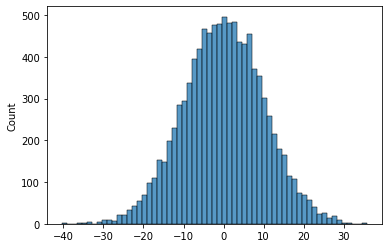

In [2]:
sns.histplot(arr)

In [10]:
from scipy import stats

def get_stats(data):
    return (
        data.mean(),
        data.std(),
        stats.skew(data),
        stats.kurtosis(data)
    )

def generate_close_data(sample, max_iter=1000, mean_tol=0.0001, std_tol=0.001, skew_tol=0.1, kurt_tol=0.1):
    mean, std, skew, kurt = get_stats(sample)
    best_sample = np.random.normal(mean, std, size=10000)
    best_mean, best_std, best_skew, best_kurt = get_stats(best_sample)
    best_mean_diff = abs(mean - best_mean)
    best_std_diff = abs(std - best_std)
    best_skew_diff = abs(skew - best_skew)
    best_kurt_diff = abs(kurt - best_kurt)
    for _ in range(max_iter):
        new_sample = np.random.normal(mean, std, size=10000)
        new_mean, new_std, new_skew, new_kurt = get_stats(new_sample)
        new_mean_diff = abs(mean - new_mean)
        new_std_diff = abs(std - new_std)
        new_skew_diff = abs(skew - new_skew)
        new_kurt_diff = abs(kurt - new_kurt)

        if (new_mean_diff < mean_tol) and (new_std_diff < std_tol) and (new_skew_diff < skew_tol) and (new_kurt_diff < kurt_tol):
            return new_sample
        elif new_mean_diff < best_mean_diff and new_std_diff < best_std_diff and new_skew_diff < best_skew_diff and new_kurt_diff < best_kurt_diff:
            best_sample = new_sample
            best_mean_diff = new_mean_diff
            best_std_diff = new_std_diff
            best_skew_diff = new_skew_diff
            best_kurt_diff = new_kurt_diff
    return best_sample

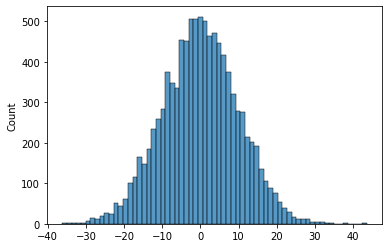

<AxesSubplot:ylabel='Count'>

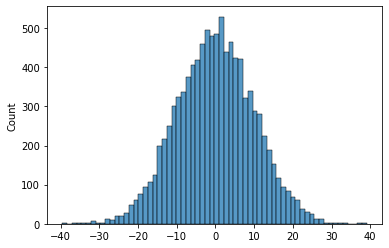

In [11]:
new_sample = generate_close_data(arr)
sns.histplot(arr)
plt.show()
sns.histplot(new_sample)

In [12]:
stats.ks_2samp(arr, new_sample)
# we fail to reject the null hypothesis, so they are drawn from the same distribution

KstestResult(statistic=0.0096, pvalue=0.746165905555301)